In [3]:
import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
#plt.style.use(['no-latex']) 
#from emcee import MASER

import astropy.units as u
from astropy.timeseries import BoxLeastSquares

import maser as ms
import starspot as ss
import astrobase as ab
#from astrobase import periodbase


from tqdm import tqdm 
# Setting directory

ddir = '/Users/katelynsmith/Desktop/Capstone/'

import warnings
warnings.filterwarnings("ignore")

import latex

/Users/katelynsmith/opt/anaconda3/envs/example/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Parameters pertaining to the AU Mic

M_s = 0.5 # Star mass (solar masses) #### REFERENCE (PAPER 6 on one note) #####
R_s = 0.75 # Star radius (solar radii) ####  REFERENCE (PAPER 6 on one note) ####
P_s = 4.86 # Star rotation period (days) ####  REFERENCE (PAPER 6 on one note) ####
i_s = 90 # Star inclination of the rotation axis relative to the line of sight (degrees) ####  ACCORDING TO MEETING WITH BEN ####
B_s = 430 # Star dipole field strength at the magnetic poles (Gauss) #### https://arxiv.org/pdf/2304.09642.pdf #### 
beta = 20 # Star magnetic obliquity (degrees) #### ACCORDING TO MEETING WITH BEN ####
phi_s0 = 0.2 # Star rotation phase at times = 0 (0 – 1) <<<<<< LEFT AS IS

# Parameters pertaining to AU Mic b

ab = 10 # Planet orbital distance (stellar radii) #### REFERENCE (PAPER 6 on one note) ####
i_pb = 89.18 # Planet inclination of the orbital axis relative to the line of sight (degrees) #### REFERENCE (PAPER 7 on one note) #### 
lamb = 0 # Planet projected spin-orbit angle (degrees) #### ranging from -15 to 18 degrees 
#REFERENCE Spin-orbit alignment and magnetic activity in the young planetary system AU Mic⋆ ####
P_pb = 8.4630351 # AU Mic b period in days
phi_p0b = 0.6 # Planet orbital phase at times = 0 (0 – 1) <<<<< LEFT AS IS
fb = 10 # Emission observing frequency (MHz) #### - MAY INCREASE TO 3 GHz REFERENCE (PAPER 6 on one note) ####

# Note - other papers say that ab is 18.5 stellar radii

# Parameters pertaining to AU Mic c

ac = 26.9 # Planet orbital distance (stellar radii) #### REFERENCE According to planet-induced radio emission from the coronae of M dwarfs: the case of Prox Cen and AU Mic
 ####
i_pc = 89.589 # http://exoplanet.eu/catalog/au_mic_c/
# projected spin-orbit angle unknown so will just use same as AU Mic b (note that the value for AU Mic b varies wildly from paper to paper)
lamc = 0

P_pc = 18.9 # AU Mic c period in days ### same ref as ac
# Using the above planet orbital phase
phi_p0c = 0.6
fc = 10 # Emission observing frequency (MHz) #### - MAY INCREASE TO 3 GHz REFERENCE (PAPER 6 on one note) ####

# Parameters pertaining to the emission cone

alpha = 75 # Emission cone opening angle (degrees) <<<<< LEFT THESE AS IS - BASED ON KAVANAGH 2023
dalpha = 5 # Emission cone thickness (degrees) <<<<< LEFT THESE AS IS - BASED ON KAVANAGH 2023

In [19]:
times = np.linspace(0, 60, 1000) # Array of observation times to compute (days)

# Call the function
# calculating for AU Mic b
vis_N_b, vis_S_b = ms.maser(M_s, R_s, P_s, i_s, B_s, beta, phi_s0, ab, i_pb, lamb, phi_p0b, fb, alpha, dalpha, times)

# calculating for AU Mic c
vis_N_c, vis_S_c = ms.maser(M_s, R_s, P_s, i_s, B_s, beta, phi_s0, ac, i_pc, lamc, phi_p0c, fc, alpha, dalpha, times)

In [20]:
total_vis_N = vis_N_b + vis_N_c
total_vis_S = vis_S_b + vis_S_c

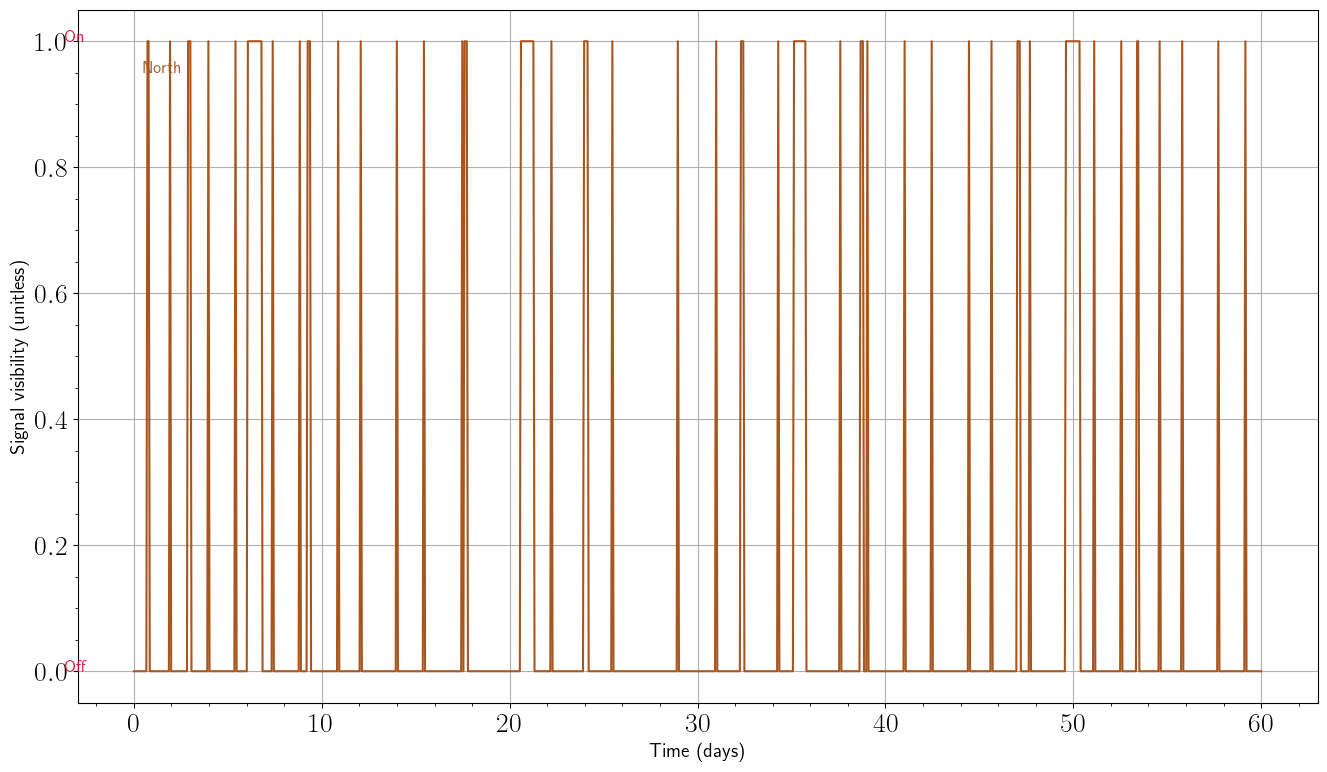

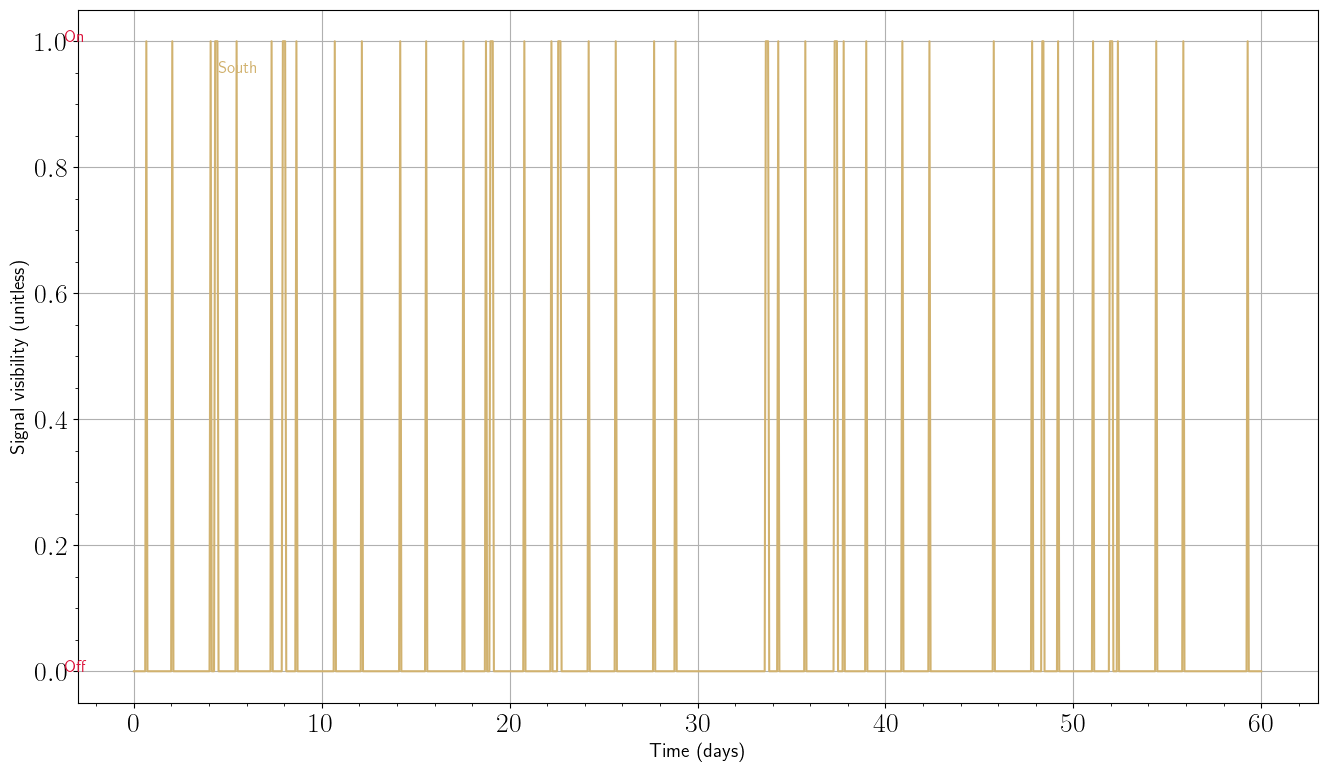

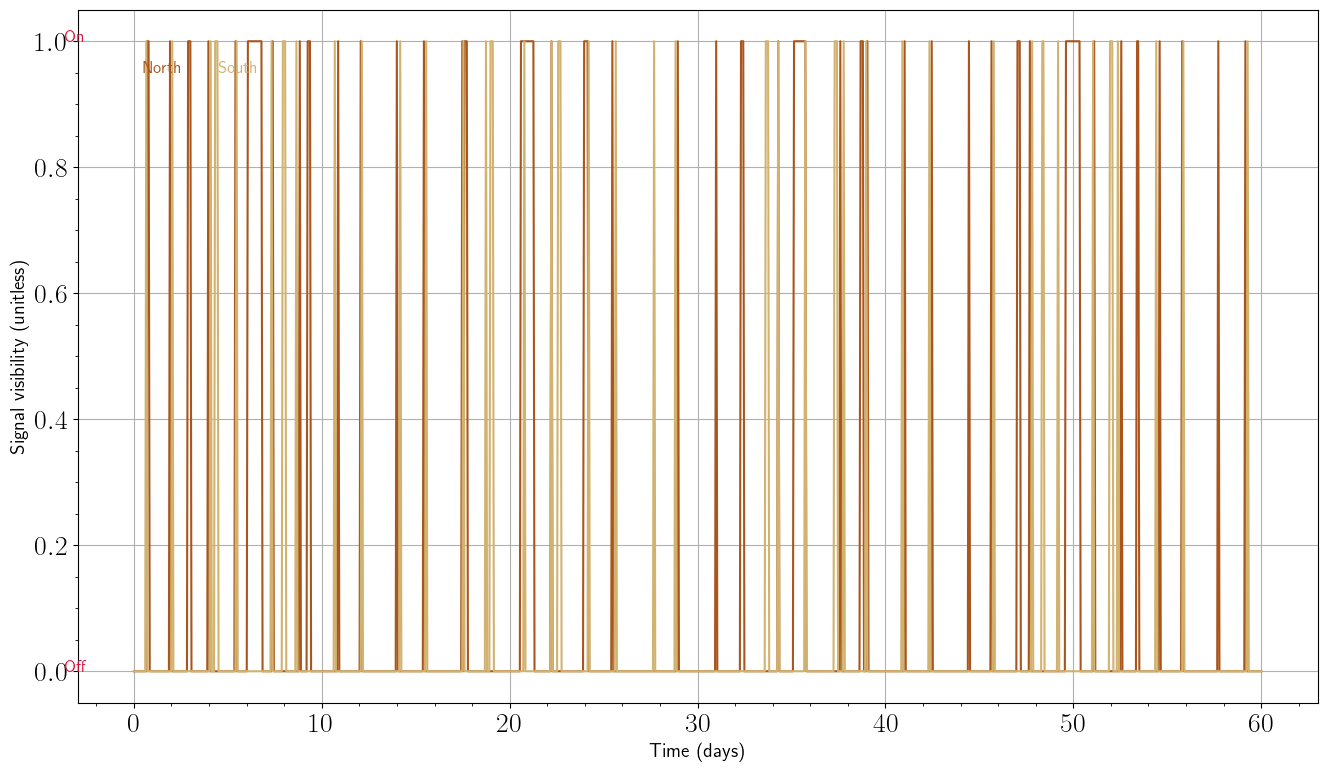

In [22]:
# Plotting results
fig = plt.figure(figsize=(16, 9))
plt.plot(times, total_vis_N, color = '#A9561E')
matplotlib.pyplot.text(-3.7, 1, 'On', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(-3.7, 0, 'Off', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(0.5, 0.95, 'North', fontdict=None, fontsize=12, color = '#A9561E')


plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Signal visibility (unitless)', fontsize=14)
plt.minorticks_on()
plt.grid()
# plt.xlim(0,5)
plt.show()

fig = plt.figure(figsize=(16, 9))
plt.plot(times, total_vis_S, color = '#D1B26F')
matplotlib.pyplot.text(-3.7, 1, 'On', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(-3.7, 0, 'Off', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(4.5, 0.95, 'South', fontdict=None, fontsize=12, color = '#D1B26F')


plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Signal visibility (unitless)', fontsize=14)
plt.minorticks_on()
plt.grid()
# plt.xlim(0,5)
plt.show()



# PLotting them together for fun
fig = plt.figure(figsize=(16, 9))
plt.plot(times, total_vis_N, color = '#A9561E')
plt.plot(times, total_vis_S, color = '#D1B26F')
matplotlib.pyplot.text(-3.7, 1, 'On', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(-3.7, 0, 'Off', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(0.5, 0.95, 'North', fontdict=None, fontsize=12, color = '#A9561E')
matplotlib.pyplot.text(4.5, 0.95, 'South', fontdict=None, fontsize=12, color = '#D1B26F')
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Signal visibility (unitless)', fontsize=14)
plt.minorticks_on()
plt.grid()
# plt.xlim(0,5)
plt.show()

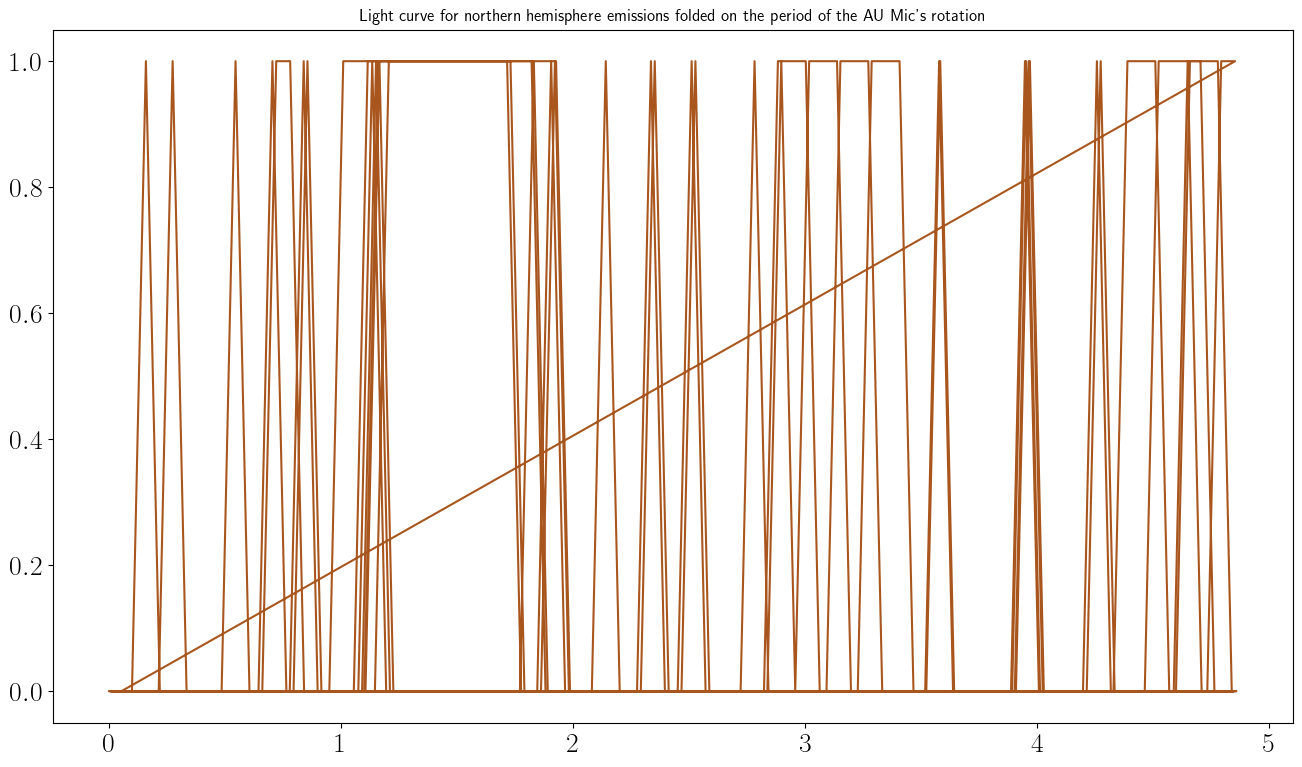

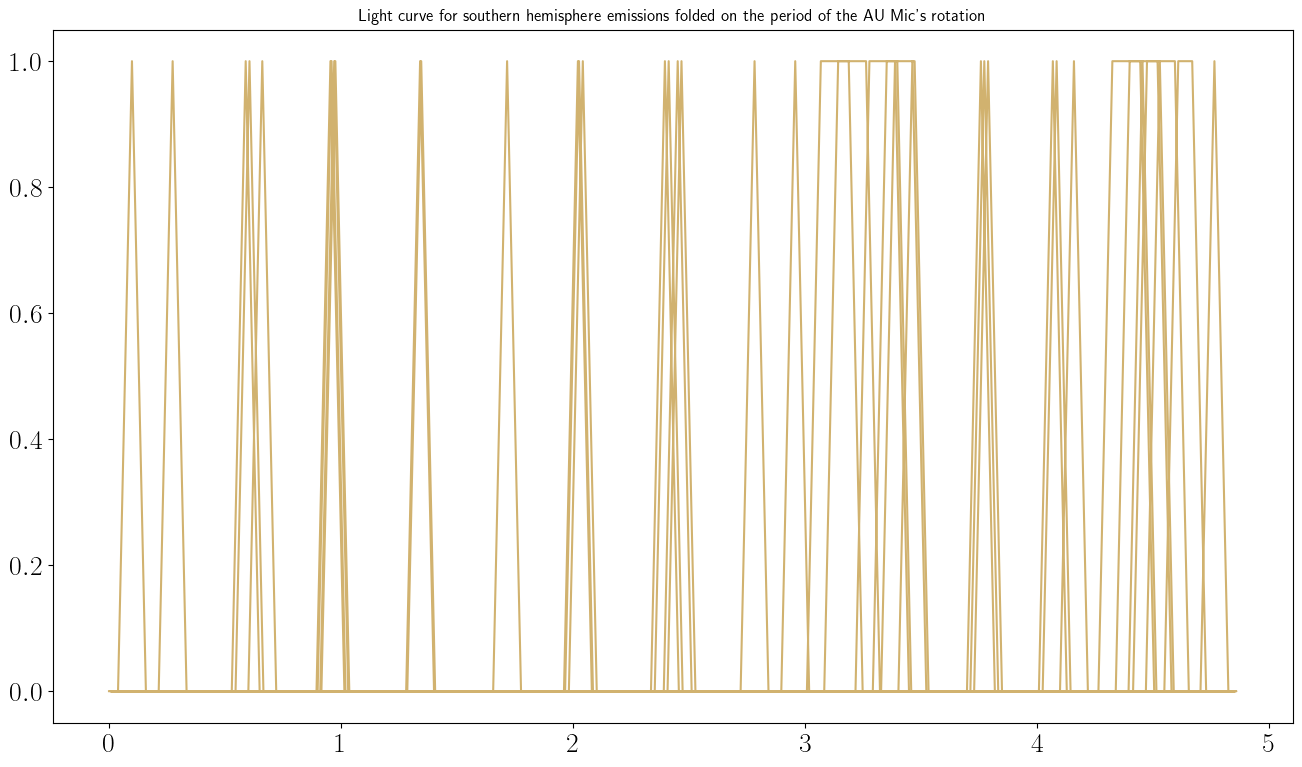

In [23]:
fig = plt.figure(figsize=(16, 9))
plt.plot(times % P_s, total_vis_N, color = '#A9561E')  # attempting to fold light curve for star period
plt.title("Light curve for northern hemisphere emissions folded on the period of the AU Mic's rotation")
plt.show()

fig = plt.figure(figsize=(16, 9))
plt.plot(times % P_s, total_vis_S, color = '#D1B26F')
plt.title("Light curve for southern hemisphere emissions folded on the period of the AU Mic's rotation")
plt.show()


In [33]:
ups_N = np.where(total_vis_N > 0)[0]
downs_N = np.where(total_vis_N < 2)[0]

ups_S = np.where(total_vis_S > 0)[0]
downs_S = np.where(total_vis_S < 2)[0]



# calculating durations of emission in the northern hemisphere

durations_N = []
for ind in tqdm(ups_N):
    state_L = total_vis_N[ind-1]
    state_R = total_vis_N[ind+1]
    time_val_L = times[ind-1]
    time_val_R = times[ind+1]
    for i in range(1,20):
        if state_L == True:
            state_L = total_vis_N[ind-1-i]
            time_val_L = times[ind-1-i]
        else:
            state_L = state_L
            time_val_L = time_val_L
            break
    for i in range(1,20):
        if state_R == True:
              state_R = total_vis_N[ind+1+i]
              time_val_R = times[ind+1+i]
        else: 
            state_R = state_R
            time_val_R = time_val_R
            break
    dur = time_val_R - time_val_L
    durations_N.append(dur)

# there is an issue in that it stores two values for some emissions (in the case where there are consecutive indices for the one emission)
print(durations_N)

# calculating durations of emission in the southern hemisphere

durations_S = []
for ind in tqdm(ups_S):
    state_L = total_vis_S[ind-1]
    state_R = total_vis_S[ind+1]
    time_val_L = times[ind-1]
    time_val_R = times[ind+1]
    for i in range(1,20):
        if state_L == True:
            state_L = total_vis_S[ind-1-i]
            time_val_L = times[ind-1-i]
        else:
            state_L = state_L
            time_val_L = time_val_L
            break
    for i in range(1,20):
        if state_R == True:
              state_R = total_vis_S[ind+1+i]
              time_val_R = times[ind+1+i]
        else: 
            state_R = state_R
            time_val_R = time_val_R
            break
    dur = time_val_R - time_val_L
    durations_S.append(dur)

print(durations_S)

100%|██████████| 103/103 [00:00<00:00, 30619.70it/s]


[0.18018018018018023, 0.18018018018018023, 0.12012012012012008, 0.24024024024024015, 0.24024024024024015, 0.24024024024024015, 0.12012012012012052, 0.12012012012012008, 0.8408408408408414, 0.8408408408408414, 0.8408408408408414, 0.8408408408408414, 0.8408408408408414, 0.8408408408408414, 0.8408408408408414, 0.8408408408408414, 0.8408408408408414, 0.8408408408408414, 0.8408408408408414, 0.8408408408408414, 0.8408408408408414, 0.12012012012012008, 0.12012012012012008, 0.24024024024024015, 0.24024024024024015, 0.24024024024024015, 0.12012012012012008, 0.12012012012012008, 0.12012012012012008, 0.12012012012012008, 0.12012012012012008, 0.24024024024024015, 0.24024024024024015, 0.24024024024024015, 0.7807807807807805, 0.7807807807807805, 0.7807807807807805, 0.7807807807807805, 0.7807807807807805, 0.7807807807807805, 0.7807807807807805, 0.7807807807807805, 0.7807807807807805, 0.7807807807807805, 0.7807807807807805, 0.7807807807807805, 0.12012012012012008, 0.3003003003003002, 0.300300300300300

100%|██████████| 55/55 [00:00<00:00, 46109.68it/s]

[0.12012012012012008, 0.1201201201201203, 0.12012012012012008, 0.24024024024024015, 0.24024024024024015, 0.24024024024024015, 0.12012012012012008, 0.12012012012012008, 0.24024024024024104, 0.24024024024024104, 0.24024024024024104, 0.12012012012012008, 0.12012012012012008, 0.12012012012012008, 0.12012012012012008, 0.12012012012012008, 0.12012012012012008, 0.12012012012012008, 0.24024024024024015, 0.24024024024024015, 0.24024024024024015, 0.12012012012012008, 0.12012012012012008, 0.24024024024024015, 0.24024024024024015, 0.24024024024024015, 0.12012012012012008, 0.12012012012012363, 0.12012012012012008, 0.12012012012012008, 0.24024024024024015, 0.24024024024024015, 0.24024024024024015, 0.12012012012012008, 0.12012012012012008, 0.24024024024024015, 0.24024024024024015, 0.24024024024024015, 0.12012012012012008, 0.12012012012012008, 0.12012012012012008, 0.12012012012012008, 0.12012012012012008, 0.12012012012012008, 0.18018018018018012, 0.18018018018018012, 0.12012012012012008, 0.12012012012

In [39]:
# retrying BLS

def period(duration, M_s, R_s, P_s, i_s, B_s, beta, phi_s0, ab, ac, i_pb, i_pc, lamb, lamc, phi_p0b, phi_p0c, fb, fc, alpha, dalpha, times):
   north_visibility_b, south_visibility_b = ms.maser(M_s, R_s, P_s, i_s, B_s, beta, phi_s0, ab, i_pb, lamb, phi_p0b, fb, alpha, dalpha, times)
   north_visibility_c, south_visibility_c = ms.maser(M_s, R_s, P_s, i_s, B_s, beta, phi_s0, ac, i_pc, lamc, phi_p0c, fc, alpha, dalpha, times)

   # check if the whole timeseries is 0

   total_north_vis = north_visibility_b + north_visibility_c
   total_south_vis = south_visibility_b + south_visibility_c

   north_BLS = BoxLeastSquares(times, 1 - total_north_vis, dy=None)
   south_BLS = BoxLeastSquares(times, 1 - total_south_vis, dy=None)

   north_periodogram = north_BLS.autopower(duration)
   south_periodogram = south_BLS.autopower(duration)

   power_north = np.argmax(north_periodogram.power)
   power_south = np.argmax(south_periodogram.power)

   best_period_N = north_periodogram.period[power_north]
   best_period_S = south_periodogram.period[power_south]

   #if np.allclose(total_north_vis,0.):
   #   best_period_N = np.nan
   #if np.allclose(total_south_vis,0.):
   #   best_period_S = np.nan
   
   return north_periodogram, south_periodogram, best_period_N, best_period_S


In [40]:
times = np.linspace(0, 50, 1000)
betas = np.linspace(beta*0.5, beta*2, 50)
inclinations = np.linspace(i_s*0.5, i_s*2 ,5)

duration = 0.2

period_grid = np.zeros((len(betas), len(inclinations),2))
for j, b in (enumerate(tqdm(betas))):
    for k, inc in enumerate(inclinations):
        true_npg, true_spg, best_period_N, best_period_S = period(duration, M_s, R_s, P_s, i_s, B_s, beta, phi_s0, ab, ac, i_pb, i_pc, lamb, lamc, phi_p0b, phi_p0c, fb, fc, alpha, dalpha, times)
        period_grid[j, k, :] = best_period_N, best_period_S

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [02:40<00:00,  3.21s/it]


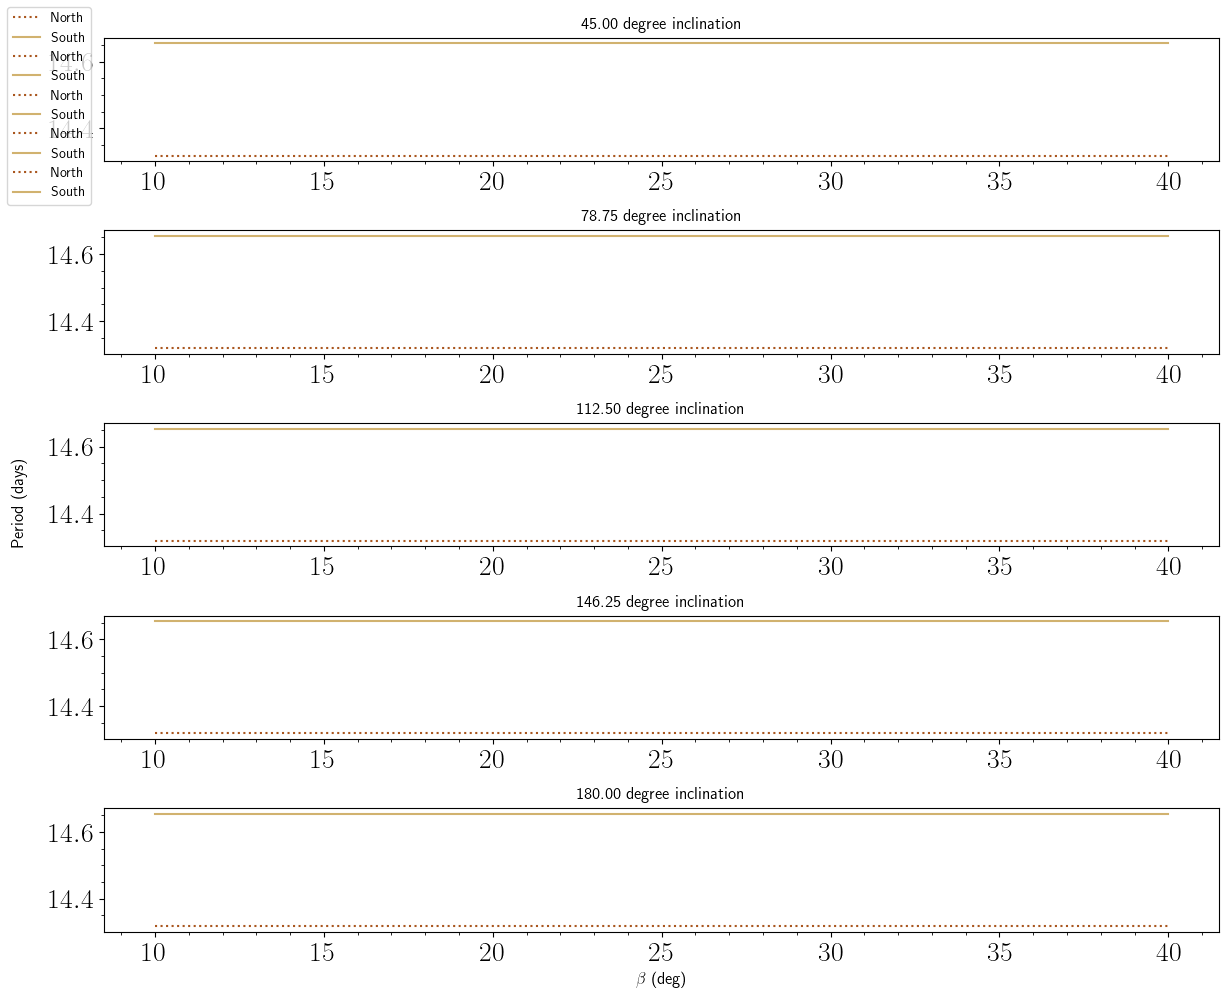

In [41]:
fig, axes = plt.subplots(5, 1, sharey=True, figsize=(12.0,10.0))

inc = ['45.00 degree inclination', '78.75 degree inclination', '112.50 degree inclination', '146.25 degree inclination', '180.00 degree inclination']
for j in range(5):
    ax = axes[j]
    axes[j].title.set_text(inc[j])
    ax.plot(betas,period_grid[:,j,0], ':', color = '#A9561E',label='North')
    ax.plot(betas,period_grid[:,j,1], color = '#D1B26F',label='South')
    
    plt.xlabel(r'$\beta$ (deg)', fontsize=12)
    ax.minorticks_on()
    
    #plt.ylabel('Period (d)')
    #ax.grid()
fig.tight_layout()
fig.legend(loc='upper left')
fig.text(-0.02, 0.5, 'Period (days)', va='center', rotation='vertical', fontsize=12)

plt.show()